In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.DataFrame({'movie':['a','b','c','a','b','c','a','b','c'],
                   'rating':[9,7,6,9,5,7,8,9,5]})

In [4]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


rating    7.222222
dtype: float64

In [5]:
df.rating.mean()

7.222222222222222

Measure of central tendency

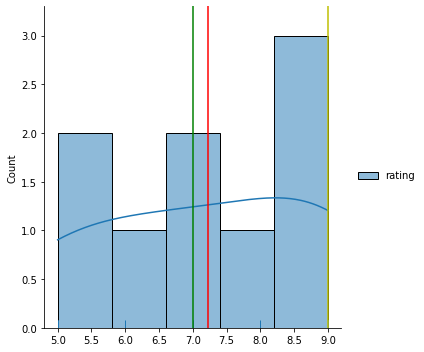

In [6]:
sns.displot(df, kde=True,rug=True)
plt.axvline(np.mean(df.rating),color='r',linestyle = '-')
plt.axvline(np.median(df.rating),color='g',linestyle = '-')
plt.axvline(df.rating.mode().values[0],color='y',linestyle = '-')

In [7]:
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 5.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


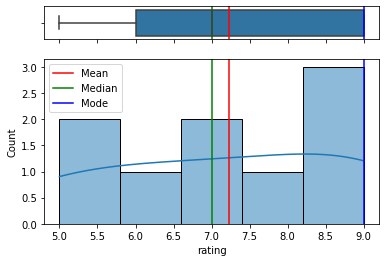

In [8]:
f,(ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.2,1)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df, x = 'rating', ax = ax_box)

ax_box.axvline(mean, color = 'r', linestyle='-')
ax_box.axvline(median, color = 'g', linestyle='-')
ax_box.axvline(mode, color = 'b', linestyle='-')

sns.histplot(data=df, x = 'rating', ax=ax_hist, kde=True)

ax_hist.axvline(mean,color='r',linestyle='-',label='Mean')
ax_hist.axvline(median,color='g',linestyle='-',label='Median')
ax_hist.axvline(mode,color='b',linestyle='-',label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [9]:
df.rating.var()

2.6944444444444446

In [10]:
df.rating.std()

1.6414763002993509

In [11]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()

In [12]:
mean

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [13]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

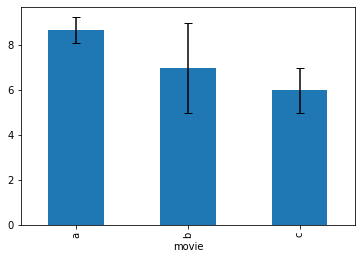

In [14]:
fig, ax = plt.subplots()
mean.plot.bar(yerr=std,ax=ax, capsize=4)

In [12]:
df_1 = pd.DataFrame({'pop_sample':range(20)})


In [13]:
df_1.sample(5).mean()

pop_sample    8.0
dtype: float64

In [14]:
df_1.sample(10).mean()

pop_sample    8.3
dtype: float64

In [15]:
df_1.mean()

pop_sample    9.5
dtype: float64

In [16]:
from scipy import stats
stats.sem(df_1)

array([1.32287566])

In [20]:
df_2 = sns.load_dataset('tips')
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


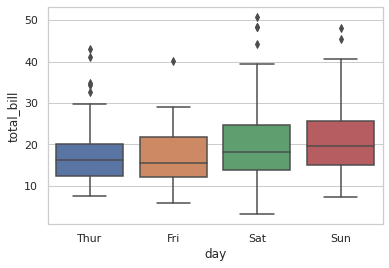

In [21]:
df_2 = sns.load_dataset('tips')
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='day',y = 'total_bill', data = df_2)

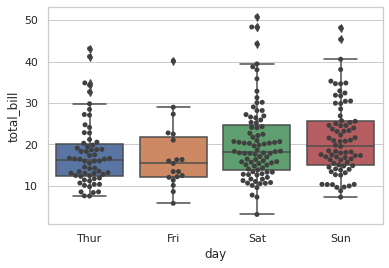

In [22]:
ax = sns.boxplot(x='day',y='total_bill',data = df_2)
ax = sns.swarmplot(x='day',y='total_bill',data = df_2, color = '0.25')

In [23]:
print(df_2['total_bill'].quantile([0.05,0.25,0.5,0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [24]:
print(df_2['total_bill'].quantile(0.75) - df_2['total_bill'].quantile(0.25))

10.779999999999998


In [25]:
df3 = sns.load_dataset('iris')  

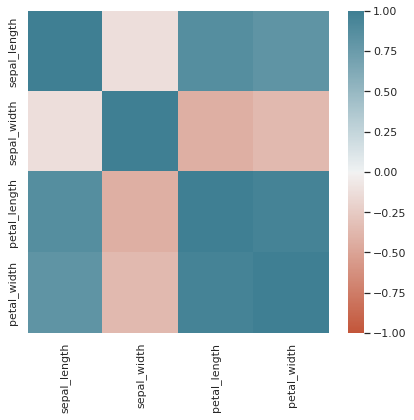

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(df3.corr(),vmin = -1, vmax = 1, cmap=sns.diverging_palette(20,220, as_cmap=True),ax=ax)
plt.tight_layout()
plt.show()

In [27]:
a = [11,12,22,11]
b = [7,8,9,10]
c= [10,11,22,23]
arr = np.array([a,b,c])

In [28]:
cov_matrix = np.cov(arr,bias=True)

In [29]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

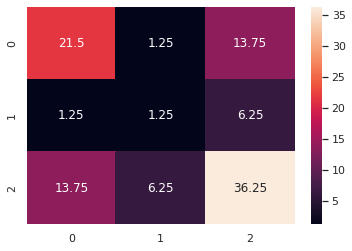

In [30]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [31]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


rating   -0.23507
dtype: float64

In [32]:
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


rating   -1.570351
dtype: float64

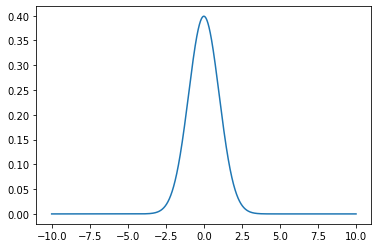

In [18]:
import numpy as np
norm1 = np.arange(-10,10, 0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1, mean, std)
plt.plot(norm1, pdf)
plt.show()

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

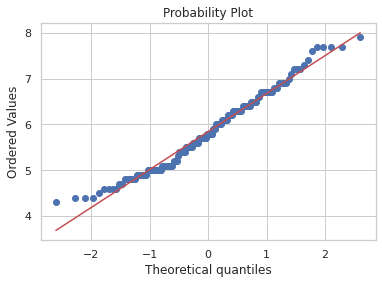

In [37]:
import pylab
stats.probplot(df3.sepal_length, plot=pylab)

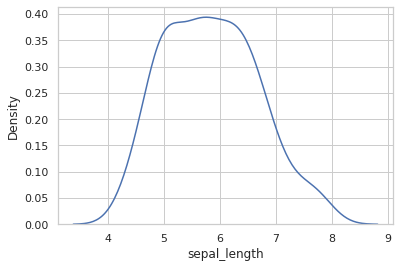

In [38]:
sns.kdeplot(df3.sepal_length)

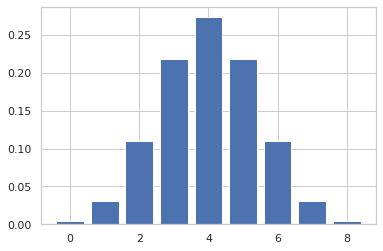

In [42]:
from scipy.stats import binom
n = 8
p = 0.5
r_value = list(range(n+1))
dist = [binom.pmf(r,n,p) for r in r_value]
plt.bar(r_value, dist)
plt.show()

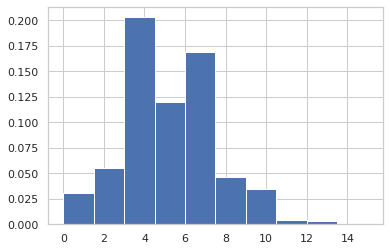

In [40]:
s = np.random.poisson(5,10000)
count, bins, ignored = plt.hist(s, 10, density = True)
plt.show()

In [6]:
import statsmodels.stats.api as sms
df3 = sns.load_dataset('iris')  
sms.DescrStatsW(df3.sepal_length).tconfint_mean() 

(5.709732481507366, 5.976934185159301)

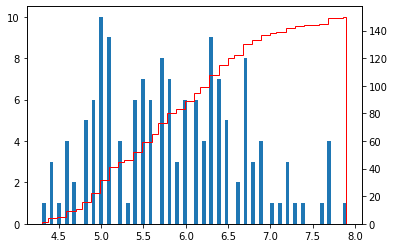

In [7]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(df3.sepal_length, bins = 80)
n, bins, patches = ax2.hist(df3.sepal_length, cumulative=1, histtype='step',
                            bins=100, color='r')

(array([  9.,  32.,  46.,  73.,  89., 115., 133., 139., 144., 150.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 1 Patch objects>)

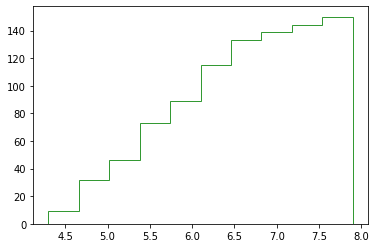

In [8]:
plt.hist(df3.sepal_length, cumulative=True, label='CDF', histtype='step',
         alpha=0.8, color='g')

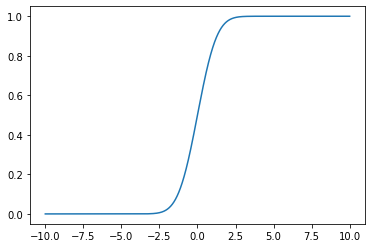

In [19]:
cdf = stats.norm.cdf(norm1)
plt.plot(norm1, cdf)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


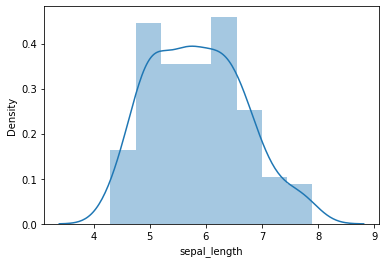

In [20]:
ax = sns.distplot(df3.sepal_length)